<a href="https://www.kaggle.com/code/fitwithbrain/notebook3bcd1c5ed7?scriptVersionId=250076978" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/calories-burnt-prediction/calories.csv


In [2]:
df = pd.read_csv("/kaggle/input/calories-burnt-prediction/calories.csv")

In [3]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
df["Gender"]=le.fit_transform(df["Gender"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


In [7]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [8]:
df = df.drop("User_ID", axis=1)

In [9]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
x = df.drop("Calories", axis=1)  
y = df["Calories"]               


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train , x_test , y_train , y_test =train_test_split(x , y , test_size = 0.3 , random_state=42)

In [13]:
x_train.shape , x_test.shape

((10500, 7), (4500, 7))

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
RMG = RandomForestRegressor()

In [16]:
model = RMG.fit(x_train , y_train)

In [17]:
pred1 = model.predict(x_test)

In [18]:
pred1

array([170.49, 191.31,  52.56, ...,  27.59, 201.19, 137.79])

In [19]:
from sklearn.metrics import r2_score , mean_absolute_error

In [20]:
print(r2_score(y_test , pred1))

0.9977549081541548


In [21]:
print(mean_absolute_error(y_test , pred1))

1.835948888888889


In [22]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': pred1})
print(comparison.head(10))

       Actual  Predicted
11499   173.0     170.49
6475    189.0     191.31
13167    53.0      52.56
862     161.0     157.24
5970    226.0     220.36
6706    179.0     177.82
3017     98.0      97.14
3781     44.0      44.88
3898     79.0      80.46
2250     59.0      58.91


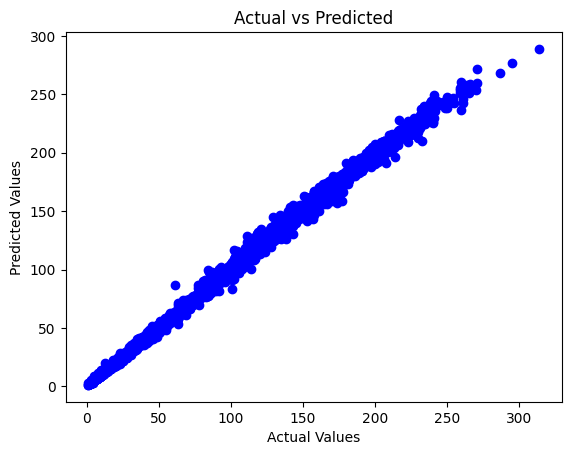

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, pred1, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [24]:
df.columns


Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [25]:
new_data = pd.DataFrame([{
    'Gender': 0,
    'Age': 42,
    'Height': 168,
    'Weight':66,
    'Duration': 45,
    'Heart_Rate': 105.0,
    'Body_Temp':97,
}])

# Predict
predicted_value = model.predict(new_data)
print("Prediction:", predicted_value[0])

Prediction: 185.28
